# Introduction

We have been given an assignment of Artificial inntelligence. It has paper which include working on Fire and smoke detection using a lightweight model for Real world Internet of thing applications. The puposed model architecture was in such a way, that it contain 14 layers First convolutional 2D layer have bias of 16 kernel size was 3 by 3 bias of 16 which has successor layer of average pooling 2D next layer was dropout of 0.5 next layer was second convolutional 2D layer same as old one having only difference of bias , this time bias was 32, and then same average pooling asnd same dropout layer, then there was 3rd convolutional 2D layerwhich has bias of 64 but same pooling and dropout layers. Then flatten layer was used , then dense layer of bias 256 having dropout of 0.2 and then dense layer of bias of 128 with same dropout and last layer of bias 2 with softmax activation function. The link of the reference paper is https://arxiv.org/abs/1905.11922 

**Puposed Methodology**

This model was chceked on two dataset first was predined foggia dataset having vast data of videos any one can make its one datset from these fire and nonfire videos. The author prepared its own dataset from these videos using frames. Many people were using this foggia dataset so author designed a model to have mininmum trainable features but maximum accuracy, When own dataset was prepared it gave new scope, but the purposed model was good at both dataset. Other people were also working on foggia daatset they started to work on this new FireNet dataset. Author maped different its model on both datset and got good results. Model was working well, when training and validation accuracy was mapped for 100 epochs. It gave accuracy linearly increasing , mean model was learning well.

**Motivation**

he accuracy of author model against foggia dataset was amazing yet charming against the FireNet dataset, similarly was precision and recall. We were assigned task for reducing trainable feature while increasing accuracy, recall , percision at same time. I and my group mate inferenced from that we prepared some models written in last cell of the notebook, we started working on it , we were applying differentn epochs for training of same model and checking. We were changing dropouts, changing pooling, removing dropouts and many other techniques. 


Then we proceded to next version of this paper, we also were impressed by some small models. Then we came to know about architecture of second model there was not major changes. There was chabge of bias from 16 to 15 in first convo2d and large in next 2 convo2D, the activation function was changed a bit. 

We were convinced by the author comments "model is designed to have outputs in the form of ‘one-hot’ encoding i.e. there are
2 outputs and only one of them is high for any given test image (fire/non-fire). The Softmax activation will ensure that
the sum of the assigned probabilities for the 2 output classes is equal to unity, and therefore, in order to increase the
estimated probability of a particular class, the model is forced to correspondingly decrease the estimated probabilities
of the other classes (and vice-versa). Therefore, using this approach, there is a clearer fire/non-fire classification. If a
Sigmoid was used, there would be only 1 output, which would have shown the probability that the given image was
fire/non-fire. Lastly, since in binary classification both Sigmoid and Softmax functions are essentially the same, there
is no ‘performance degradation’ using Softmax over Sigmoid" for activation function. We made inferences from there that there is mathematical relationship in the changing of the layer. Since author mapped its accuracy against different other models in grapgh and table. We approached to these models specifically 'Saponara' and 'Elenashi' model. 

**Work**


We stopped working on first version of FireNet but rather made matrices for second models relation we came to know that we have to select less top convo2D layer so most suitable option was use of 14 bias. Since it is first layer. We inferred that if we used 12 as first layer then we will have to calculate relation of third to second layer and found doubling of increment in bias similar for 13 and 14 and first layer. We found some models written below. We were learned from bias 12 as first layer. We made calculations and selected dome models for 13 and 14 as base. Then we were chceking it aginst different dropouta and activation function. Then we were running the models for 50 epochs. We were notcing training accuracy, that it si increasing or not. We were also notcing validation accuracy, that it is going with training accurcay or getting worse. We were changing activation function, dense layers, droput of FireNet version 2 to get best results for training versus validation accuracy. When we got good sequence for 14 as base convo2D layer we run all 14's for 50 epochs. e and i got significant testing accuracy. When compiled for 70 epochs a got 74%, b got 89%, c got 85, d got 70, e got 91.04% testing accuracy, f got 90%, g got 84.27%, h got 80 while i got 93.46% evaluation accuracy against test data. We notice e and i. We done 90 epochs for next phase now. Now we installed weights for our training saving and loading model when necessary. For 90 epcohs accuracies of all were down but b maintain it and increased to 92.76% accuracy against test data. Now , we noted that which model is getting highest accuracy at which points. We formed column given below. We checked b for 100 epochs it given 81.4, mean 90 epochs was its best position. Now, we extracted some base on these epochs, e , i and b were performing well so we extracted all others. We changed batch size form 32 to 48. But none of e,i, b was performing well. Now we start using weights, we epoch the model to 30 or 40 epoch save the weight load it again when to epoch for 70,80,90. While using weights we noted some things, some models were performing well at sudden position but not good at the edges of this postions. We started removing second dense layer and found positive results.We noted that i was outstanding when first epoch was 10 and second epoch was 50, it give accuracy of 95.63% on evaluation against test data with two dense layers. Similarly e for 10 as first and 50 epoch as second got 93%. i on 10 as first and 70 as second got 94.95 accuracy. When removed second dense layer, we also run the e,i and b for some linear epochs in which we got our result. When e was run for 10,20,30,40,50 epoch it gave accuracy of 94.26%. Now, we tried four models, one was i with 10,50 it gave 95.63% elite accuracy, e was run linearly it gave 94.26% on 10,20,30,40,50th. Here we found ou model which is presented below.


**Conclusion and Discussion**


Our model was working well, providing nice accuracy for test data, good prediction and linear curve. Model is generalizing the things well, having training data augmentation. Since trainable features are decreased and accuracy minorly achieved, model is performing good at new data, learning data is already very small.
But when epochs are increased from 50, model is not performing well, model is perhap remembering the train data instead of generaalization. So improvements are needed there which would include normalization, enhancing hyper peramters, changing train-test split.



In [ ]:
import os
import math
import keras
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense, Activation, AveragePooling2D

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Train data augmentation
train_datagen = image.ImageDataGenerator(rescale = 1/255,horizontal_flip = True,zoom_range = 0.2,
   shear_range = 0.2,rotation_range = 20,width_shift_range = 0.2,height_shift_range = 0.2,validation_split = 0.1) 

train_generator = train_datagen.flow_from_directory(directory = "/content/drive/MyDrive/Data/Train",
    target_size = (64,64), batch_size = 32,class_mode = 'categorical',shuffle = True,seed = 42,subset = 'training')

val_generator = train_datagen.flow_from_directory(
    directory = "/content/drive/MyDrive/Data/Train",target_size = (64,64), batch_size = 32,class_mode = 'categorical',
    shuffle = True,seed = 42,subset = 'validation')

Found 2183 images belonging to 2 classes.
Found 242 images belonging to 2 classes.


In [ ]:
#Test data augmentation
test_datagen =image.ImageDataGenerator(
   rescale =1/255)
test_data =test_datagen.flow_from_directory(directory="/content/drive/MyDrive/Data/Test",target_size= (64,64),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 871 images belonging to 2 classes.


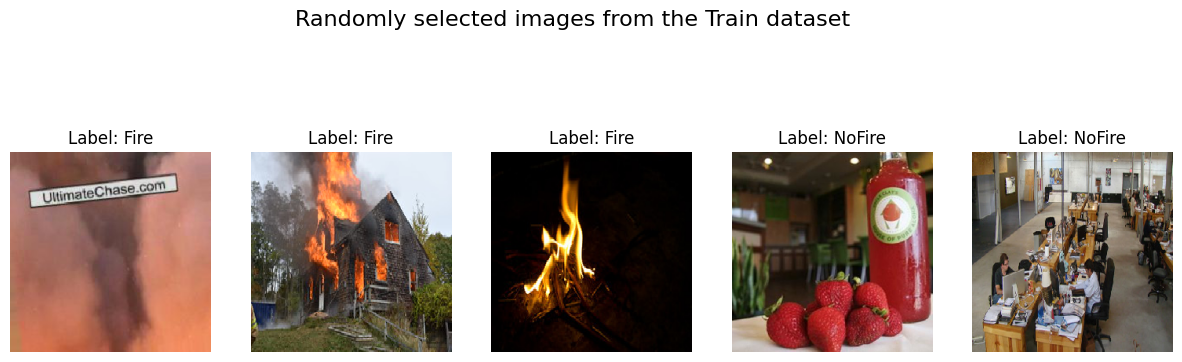

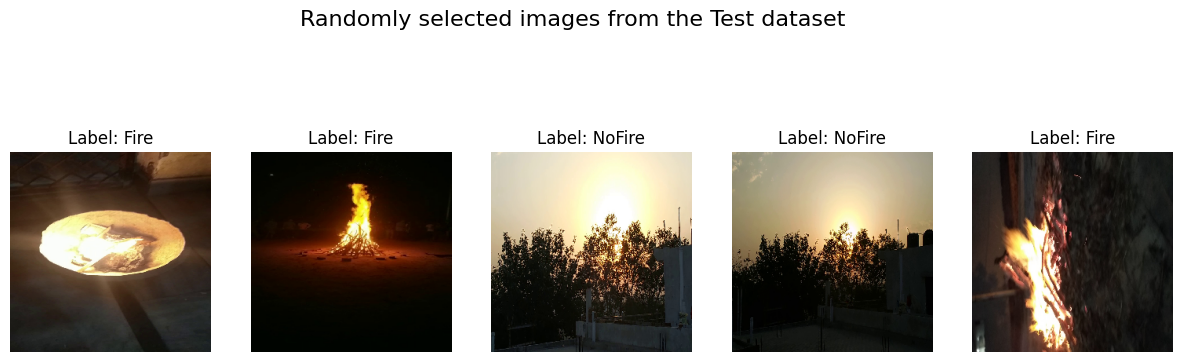

In [ ]:
# Define a function to plot images and their labels
def plot_images(images, labels, title):
    fig, axs = plt.subplots(nrows=1, ncols=len(images), figsize=(15,5))
    fig.suptitle(title, fontsize=16)

    for i in range(len(images)):
        axs[i].imshow(images[i])
        axs[i].set_title('Label: ' + str(labels[i]))
        axs[i].axis('off')

    plt.show()

# Select 5 random images from the Train dataset
train_image_paths = np.random.choice(train_generator.filepaths, size=5, replace=False)
train_images = [image.load_img(path, target_size=(256,256)) for path in train_image_paths]
train_labels = [os.path.basename(os.path.dirname(path)) for path in train_image_paths]

# Select 5 random images from the Test dataset
test_image_paths = np.random.choice(test_data.filepaths, size=5, replace=False)
test_images = [image.load_img(path, target_size=(256,256)) for path in test_image_paths]
test_labels = [os.path.basename(os.path.dirname(path)) for path in test_image_paths]

# Convert images to arrays
train_images = np.array([image.img_to_array(img) for img in train_images])
test_images = np.array([image.img_to_array(img) for img in test_images])

# Rescale pixel values to range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

# Plot the selected images with their labels
plot_images(train_images, train_labels, 'Randomly selected images from the Train dataset')
plot_images(test_images, test_labels, 'Randomly selected images from the Test dataset')

In [ ]:
model = Sequential()

model.add(Conv2D(14, kernel_size=(3,3), activation='relu', input_shape = (64,64,3), use_bias=True))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(15, kernel_size=(3,3), activation='relu', input_shape = (64,64,3), use_bias=True))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(18, kernel_size=(3,3), activation='sigmoid', use_bias=True))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(256, activation= 'sigmoid', use_bias=True))
model.add(Dropout(rate=0.2))

model.add(Dense(2, activation='softmax', use_bias=True))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 14)        392       
                                                                 
 average_pooling2d (AverageP  (None, 31, 31, 14)       0         
 ooling2D)                                                       
                                                                 
 dropout (Dropout)           (None, 31, 31, 14)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 15)        1905      
                                                                 
 average_pooling2d_1 (Averag  (None, 14, 14, 15)       0         
 ePooling2D)                                                     
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 15)        0

In [8]:
cnnModel = model.fit(train_generator,steps_per_epoch = 68, epochs = 10,
                     validation_data = val_generator,validation_steps = 8)

Epoch 1/10
68/68 [==============================] - 398s 6s/step - loss: 0.7500 - accuracy: 0.5676 - val_loss: 0.5858 - val_accuracy: 0.7107
Epoch 2/10
68/68 [==============================] - 59s 869ms/step - loss: 0.5913 - accuracy: 0.6960 - val_loss: 0.5245 - val_accuracy: 0.7769
Epoch 3/10
68/68 [==============================] - 63s 918ms/step - loss: 0.5798 - accuracy: 0.7011 - val_loss: 0.5638 - val_accuracy: 0.7231
Epoch 4/10
68/68 [==============================] - 63s 920ms/step - loss: 0.5772 - accuracy: 0.7043 - val_loss: 0.4962 - val_accuracy: 0.7686
Epoch 5/10
68/68 [==============================] - 63s 931ms/step - loss: 0.5439 - accuracy: 0.7257 - val_loss: 0.4863 - val_accuracy: 0.7686
Epoch 6/10
68/68 [==============================] - 60s 883ms/step - loss: 0.5386 - accuracy: 0.7364 - val_loss: 0.4414 - val_accuracy: 0.7934
Epoch 7/10
68/68 [==============================] - 63s 914ms/step - loss: 0.5272 - accuracy: 0.7387 - val_loss: 0.5948 - val_accuracy: 0.6653
E

In [ ]:
cnnModel = model.fit(train_generator,steps_per_epoch = 68, epochs = 20,
                     validation_data = val_generator,validation_steps = 8)

Epoch 1/20
68/68 [==============================] - 61s 895ms/step - loss: 0.5135 - accuracy: 0.7448 - val_loss: 0.4558 - val_accuracy: 0.7975
Epoch 2/20
68/68 [==============================] - 60s 884ms/step - loss: 0.5333 - accuracy: 0.7350 - val_loss: 0.4436 - val_accuracy: 0.7893
Epoch 3/20
68/68 [==============================] - 59s 871ms/step - loss: 0.5015 - accuracy: 0.7471 - val_loss: 0.4410 - val_accuracy: 0.8099
Epoch 4/20
68/68 [==============================] - 60s 879ms/step - loss: 0.4984 - accuracy: 0.7513 - val_loss: 0.4570 - val_accuracy: 0.7810
Epoch 5/20
68/68 [==============================] - 55s 811ms/step - loss: 0.4791 - accuracy: 0.7675 - val_loss: 0.4217 - val_accuracy: 0.8306
Epoch 6/20
68/68 [==============================] - 60s 885ms/step - loss: 0.4904 - accuracy: 0.7657 - val_loss: 0.4699 - val_accuracy: 0.7975
Epoch 7/20
68/68 [==============================] - 61s 886ms/step - loss: 0.4831 - accuracy: 0.7685 - val_loss: 0.4128 - val_accuracy: 0.8306

In [ ]:
cnnModel = model.fit(train_generator,steps_per_epoch = 68, epochs = 30,
                     validation_data = val_generator,validation_steps = 8)

Epoch 1/30
68/68 [==============================] - 58s 856ms/step - loss: 0.4110 - accuracy: 0.8094 - val_loss: 0.3396 - val_accuracy: 0.8595
Epoch 2/30
68/68 [==============================] - 57s 842ms/step - loss: 0.4119 - accuracy: 0.8033 - val_loss: 0.3100 - val_accuracy: 0.8967
Epoch 3/30
68/68 [==============================] - 56s 835ms/step - loss: 0.3817 - accuracy: 0.8294 - val_loss: 0.3263 - val_accuracy: 0.8760
Epoch 4/30
68/68 [==============================] - 61s 909ms/step - loss: 0.4034 - accuracy: 0.8108 - val_loss: 0.3517 - val_accuracy: 0.8595
Epoch 5/30
68/68 [==============================] - 57s 827ms/step - loss: 0.4049 - accuracy: 0.8103 - val_loss: 0.3362 - val_accuracy: 0.8512
Epoch 6/30
68/68 [==============================] - 60s 889ms/step - loss: 0.3826 - accuracy: 0.8233 - val_loss: 0.3036 - val_accuracy: 0.9008
Epoch 7/30
68/68 [==============================] - 59s 875ms/step - loss: 0.3891 - accuracy: 0.8238 - val_loss: 0.4740 - val_accuracy: 0.7603

In [ ]:
cnnModel = model.fit(train_generator,steps_per_epoch = 68, epochs = 40,
                     validation_data = val_generator,validation_steps = 8)

Epoch 1/40
68/68 [==============================] - 62s 908ms/step - loss: 0.3528 - accuracy: 0.8457 - val_loss: 0.2810 - val_accuracy: 0.9008
Epoch 2/40
68/68 [==============================] - 61s 902ms/step - loss: 0.3325 - accuracy: 0.8508 - val_loss: 0.2572 - val_accuracy: 0.9008
Epoch 3/40
68/68 [==============================] - 61s 901ms/step - loss: 0.3504 - accuracy: 0.8443 - val_loss: 0.2708 - val_accuracy: 0.9008
Epoch 4/40
68/68 [==============================] - 62s 911ms/step - loss: 0.3540 - accuracy: 0.8443 - val_loss: 0.2568 - val_accuracy: 0.9215
Epoch 5/40
68/68 [==============================] - 61s 901ms/step - loss: 0.3424 - accuracy: 0.8494 - val_loss: 0.2344 - val_accuracy: 0.9256
Epoch 6/40
68/68 [==============================] - 61s 887ms/step - loss: 0.3552 - accuracy: 0.8410 - val_loss: 0.2507 - val_accuracy: 0.9050
Epoch 7/40
68/68 [==============================] - 60s 884ms/step - loss: 0.3377 - accuracy: 0.8498 - val_loss: 0.2545 - val_accuracy: 0.9091

In [ ]:
cnnModel = model.fit(train_generator,steps_per_epoch = 68, epochs = 50,
                     validation_data = val_generator,validation_steps = 8)

Epoch 1/50
68/68 [==============================] - 61s 902ms/step - loss: 0.3038 - accuracy: 0.8726 - val_loss: 0.2336 - val_accuracy: 0.9174
Epoch 2/50
68/68 [==============================] - 60s 881ms/step - loss: 0.3091 - accuracy: 0.8694 - val_loss: 0.2194 - val_accuracy: 0.9380
Epoch 3/50
68/68 [==============================] - 57s 843ms/step - loss: 0.3026 - accuracy: 0.8661 - val_loss: 0.1924 - val_accuracy: 0.9132
Epoch 4/50
68/68 [==============================] - 57s 831ms/step - loss: 0.3137 - accuracy: 0.8672 - val_loss: 0.2286 - val_accuracy: 0.9215
Epoch 5/50
68/68 [==============================] - 61s 884ms/step - loss: 0.3011 - accuracy: 0.8735 - val_loss: 0.2414 - val_accuracy: 0.9339
Epoch 6/50
68/68 [==============================] - 56s 829ms/step - loss: 0.3040 - accuracy: 0.8731 - val_loss: 0.1933 - val_accuracy: 0.9380
Epoch 7/50
68/68 [==============================] - 60s 884ms/step - loss: 0.3055 - accuracy: 0.8717 - val_loss: 0.2145 - val_accuracy: 0.9091

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data, steps=math.ceil(871/32))

test_accuracy_percentage = test_acc * 100
print('Test accuracy:', test_accuracy_percentage, '%')

28/28 [==============================] - 198s 7s/step - loss: 0.1998 - accuracy: 0.9323
Test accuracy: 93.22617650032043 %


In [ ]:
#Save the weights
model.save_weights('/content/drive/MyDrive/As4078weights/BraE_weights.h5')

In [ ]:
#Load weights
model.load_weights('/content/drive/MyDrive/As4078weights/BraE_weights.h5')

In [ ]:
def print_evaluation_metrics(model, test_data):
    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(test_data, steps=math.ceil(871/32))

    # Print the test accuracy
    test_accuracy_percentage = test_acc * 100
    print('Test accuracy:', test_accuracy_percentage, '%')

    # Make predictions on the test data
    test_predictions = model.predict(test_data, steps=math.ceil(871/32))

    # Convert the predictions from one-hot encoded format to class labels
    test_predictions_labels = np.argmax(test_predictions, axis=1)

    # Get the true class labels for the test data
    test_true_labels = test_data.classes

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(test_true_labels, test_predictions_labels)
    print('Confusion Matrix:\n', confusion_mat)

    # Compute the classification report
    class_report = classification_report(test_true_labels, test_predictions_labels)
    print('Classification Report:\n', class_report)

    # Compute the precision and recall values
    tp = np.diag(confusion_mat)
    fp = np.sum(confusion_mat, axis=0) - tp
    fn = np.sum(confusion_mat, axis=1) - tp
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print('Precision:', precision)
    print('Recall:', recall)

print('Test accuracy:', test_accuracy_percentage, '%')
print_evaluation_metrics(model, test_data)


Test accuracy: 93.22617650032043 %
28/28 [==============================] - 26s 948ms/step - loss: 0.1998 - accuracy: 0.9323
Test accuracy: 93.22617650032043 %
28/28 [==============================] - 25s 883ms/step
Confusion Matrix:
 [[389 204]
 [195  83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.66      0.66       593
           1       0.29      0.30      0.29       278

    accuracy                           0.54       871
   macro avg       0.48      0.48      0.48       871
weighted avg       0.55      0.54      0.54       871

Precision: [0.66609589 0.28919861]
Recall: [0.65598651 0.29856115]


In [ ]:
import pandas as pd

# Enter the values for your model
your_trainable_params = 171403
your_accuracy = 93.22
your_precision = 66.61
your_recall = 65.60

# Enter the values for the reference paper's model
ref_trainable_params = 646818
ref_accuracy = 93.91
ref_precision = 97
ref_recall = 94

# Create a table to display the results
data = {'Model': ['Your Model', 'Reference Paper Model'],
        'Trainable Parameters': [your_trainable_params, ref_trainable_params],
        'Accuracy': [your_accuracy, ref_accuracy],
        'Precision': [your_precision, ref_precision],
        'Recall': [your_recall, ref_recall]}
df = pd.DataFrame(data)
print(df)


                   Model  Trainable Parameters  Accuracy  Precision  Recall
0             Your Model                171403     93.22      66.61    65.6
1  Reference Paper Model                646818     93.91      97.00    94.0


In [ ]:
import os
from PIL import Image

# Define the paths to the subfolders
fire_folder = "/content/drive/MyDrive/new/Fire"
no_fire_folder = "/content/drive/MyDrive/new/NoFire"

# Create a list to store the predictions
predictions = []

# Loop through the fire images and get predictions
for filename in os.listdir(fire_folder):
    if filename.endswith(".jpg"):
        img = Image.open(os.path.join(fire_folder, filename))
        img = img.resize((64, 64))
        img = np.array(img) / 255
        img = np.array([img])
        prediction = model.predict(img)
        if prediction.any() > 0.5:
            predictions.append('Fire detected')
        else:
            predictions.append('No fire detected')

# Loop through the no-fire images and get predictions
for filename in os.listdir(no_fire_folder):
    if filename.endswith(".jpg"):
        img = Image.open(os.path.join(no_fire_folder, filename))
        img = img.resize((64, 64))
        img = np.array(img) / 255
        img = np.array([img])
        prediction = model.predict(img)
        if prediction.any() < 0.5:
            predictions.append('Fire detected')
        else:
            predictions.append('No fire detected')

# Print the predictions for all images
for i, prediction in enumerate(predictions):
    if i < 10:
        print(f"Fire image {i+1}: {prediction}")
    else:
        print(f"No fire image {i-9}: {prediction}")


1/1 [==============================] - 0s 23ms/step
Fire image 1: Fire detected
Fire image 2: Fire detected
Fire image 3: Fire detected
Fire image 4: Fire detected
Fire image 5: Fire detected
Fire image 6: Fire detected
Fire image 7: Fire detected
Fire image 8: Fire detected
Fire image 9: No fire detected
Fire image 10: No fire detected
No fire image 1: No fire detected
No fire image 2: No fire detected
No fire image 3: No fire detected
No fire image 4: No fire detected
No fire image 5: No fire detected
No fire image 6: No fire detected
No fire image 7: No fire detected
No fire image 8: No fire detected


In [ ]:
#Some examples of inference from FireNet version one are following
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape = (64,64,3), use_bias=True))
model.add(AveragePooling2D((2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', use_bias=True))
model.add(AveragePooling2D((2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(64, kernel_size=(3,3), activation= 'relu', use_bias=True))
model.add(AveragePooling2D((2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation= 'relu', use_bias=True))
model.add(Dropout(rate=0.2))
model.add(Dense(128, activation= 'relu', use_bias=True))
model.add(Dense(2, activation='softmax', use_bias=True))
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model = Sequential()

model.add(Conv2D(14, kernel_size=(3,3), activation='sigmoid', input_shape = (64,64,3), use_bias=True))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(15, kernel_size=(3,3), activation='sigmoid', input_shape = (64,64,3), use_bias=True))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(19, kernel_size=(3,3), activation='sigmoid', use_bias=True))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(256, activation= 'sigmoid', use_bias=True))
model.add(Dropout(rate=0.2))

model.add(Dense(128, activation= 'sigmoid', use_bias=True))

model.add(Dense(2, activation='softmax', use_bias=True))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model = Sequential()

model.add(Conv2D(14, kernel_size=(3,3), activation='sigmoid', input_shape = (64,64,3), use_bias=True))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(15, kernel_size=(3,3), activation='sigmoid', input_shape = (64,64,3), use_bias=True))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(17, kernel_size=(3,3), activation='sigmoid', use_bias=True))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(256, activation= 'sigmoid', use_bias=True))
model.add(Dropout(rate=0.2))

model.add(Dense(128, activation= 'sigmoid', use_bias=True))

model.add(Dense(2, activation='softmax', use_bias=True))

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
Inferences from FireNet v2

For 12 as base of convo 2D we may have
12,18,28
12,15,24
12,14,32
12,18,24
12,16,32
12,18,54
12,16,32
12,16,24
12,15,32
12,13,15
12,14,18
12,16,24
For 13 as base of convo 2D we may have
13,14,16
13,15,19
13,16,22
13,17,25
13,18,28
For 12 as base of convo 2D we may have
12,13,15
12,14,18
12,15,21
12,16,24
12,17,27
12,15,21
12,18,32
12,15,24
12,18,54
12,16,32
12,16,24

# All above 12 biased layered Model have
256 Dense
2 Dense


# For 14 as base of convo 2D we have
Foolowing all have 32 batch
Following all have same dense layer, same dropouts,same activation function as related to FireNet v2
a=14,17,23
b= 14,18,26
c=14,19,29
d=14,15,17
e=14,15,18
f=14,15,19
g=14,16,20
h=14,16,19
i=14,16,18

In [ ]:
# Some random good results of the models, their parameters can be note and adapt
same dense layer, same dropouts,same activation function as related to FireNet v2
i=(epochs=10,epochs=40,epochs=70)=93.4%
i=(10,50)=94.02%
e=(10,40,70)=91.04%
b=(10,40,70)=88.51%
b=(10,40,70,90)=92.76%
f=(10,40.70.90)=88.28%
i=10,30,60=90.7%    bacth_size=48
i=10,30,60,80=80.71%   bacth_size=48
i=10,30,60=91.3% second convo2D relu is changed to sigmoid
i=10,30,60,80=90.71% second convo2D relu is changed to sigmoid
b= 10,50,70=92.19% second convo2D relu is changed to sigmoid

In [ ]:
Model FireNet version 1

16 bias relu
Average pooling dropot=0.5
32 relu
avg 0.5
64 relu
avg 0.5
flat
256 relu 0.2
128 relu
2 softmax

Model FireNet version 2

15 bias relu
Average pooling dropot=0.5
20 relu
avg 0.5
30 sigmoid
avg 0.5
flat
256 sigmoid 0.2
32 sigmoid 
2 softmax
